In [1]:
import numpy as np

class Affine_Scaling: #classでの実装
    
    def __init__(self,a,x0,alpha,eps): #初期化
        self.a = a #係数行列
        self.x0 = x0 #初期内点
        self.alpha = alpha #ステップサイズ
        self.eps = eps #収束判定
        self.var = len(x0) #変数の数
    
    def build_mat(self): #各行列の作成
        self.b = []
        for i in range(len(self.a)-1):
            temp = self.a[i].pop()
            for j in range(len(self.a)-1):
                if j == i:
                    self.a[i].append(1)
                else:
                    self.a[i].append(0)
            self.b.append(temp)
        self.c = self.a.pop()

        while len(self.c) < len(self.a[0]):
            self.c.append(0)

        self.A = np.matrix(self.a)
        self.b = np.matrix(self.b).T
        self.c = -np.matrix(self.c).T

        n = len(self.x0)
        for i in range(len(self.b)):
            temp = self.b[i,0]
            for j in range(n):
                temp -= self.A[i,j] * self.x0[j]
            self.x0.append(temp)
        self.x0 = np.matrix(self.x0).T
        
    def exe(self): #実行
        self.build_mat() #各行列の作成
        xk = self.x0
        yield xk[0:self.var]
        while True: #繰り返し
            Xk = np.diagflat(xk.T) #更新
            yk = np.linalg.solve(self.A * Xk * Xk * self.A.T, self.A * Xk * Xk * self.c)
            zk = self.c - self.A.T * yk
            if all(zk == 0): #zkがすべて0ならば終了
                break
            dx = -(Xk * Xk * zk) / np.linalg.norm(Xk * zk)
            xk = xk + self.alpha * dx

            for i in range(self.var): #出力
                print("x{} = {}".format(i+1, xk[i,0]))
            print ("f  = {}".format((-self.c.T * xk)[0,0]))

            yield xk[0:self.var]
            
            if np.linalg.norm(dx) < self.eps: #十分収束していれば終了
                break


In [2]:
a=[[1,2,10],
   [2,1,8],
   [600,900]]
x0= [1,1]

obj = Affine_Scaling(a, x0, alpha=0.5, eps=10e-5)


x1 = 1.2223567997093325
x2 = 1.390089489767848
f  = 1984.4946206166628
x1 = 1.4058234308884292
x2 = 1.9108371352825098
f  = 2563.2474802873166
x1 = 1.4811131423895862
x2 = 2.5455496736470535
f  = 3179.6625917161
x1 = 1.4395546340054068
x2 = 3.1924466214556886
f  = 3736.9347397133643
x1 = 1.3716326794057792
x2 = 3.696157802263525
f  = 4149.52162968064
x1 = 1.3586797548257004
x2 = 3.9888166835663554
f  = 4405.14286810514
x1 = 1.424250681532002
x2 = 4.1078775078723
f  = 4551.640166004271
x1 = 1.5517451921375234
x2 = 4.119768295934349
f  = 4638.838581623428
x1 = 1.6894252506500325
x2 = 4.090241147437342
f  = 4694.8721830836275
x1 = 1.7966798778618578
x2 = 4.059689589223491
f  = 4731.728557018257
x1 = 1.8690487785508016
x2 = 4.038177165727268
f  = 4755.788716285022
x1 = 1.9158060660145897
x2 = 4.024352484483175
f  = 4771.4008756436115
x1 = 1.9457855237771626
x2 = 4.015595653815804
f  = 4781.507402700521
x1 = 1.9650349543264445
x2 = 4.010025885632506
f  = 4788.044269665122
x1 = 1.97742590511

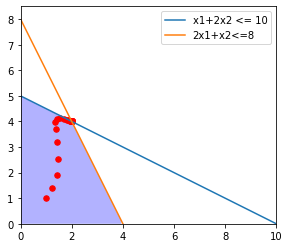

In [3]:
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 100)
y1 = 5 - 0.5*t
y2 =  8 - 2*t
y3 = np.zeros_like(t)
y4 = np.minimum(y1, y2)

y5=16/3-2/3*t

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, y1, label="x1+2x2 <= 10")
plt.plot(t, y2, label="2x1+x2<=8")
#plt.plot(t, y5, label="f")
plt.fill_between(t, y3, y4, where=y4>y3, facecolor='blue', alpha=0.3)
plt.ylim(0, 8.5)
plt.xlim(0, 10)
plt.legend(loc=0)

for x in obj.exe():
    #print(x) 
    plt.scatter([x[0,0]], [x[1,0]],c='red',s=30)
    plt.ylim(0, 8.5)

plt.show()